In [1]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [2]:
# pip install -U imbalanced-learn

In [2]:
# df = pd.read_csv('../combined_profile.csv')
# # df.info()
# df['status']= df['status'].apply(lambda x:x.strip())
# df['gender']= df['gender'].apply(lambda x:x.strip())
# df

df = pd.read_csv('../final_data_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8454 entries, 0 to 8453
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   username                        8454 non-null   object 
 1   age                             8452 non-null   float64
 2   occupation                      8450 non-null   object 
 3   status                          8454 non-null   object 
 4   gender                          8454 non-null   object 
 5   filtered sentence               8454 non-null   object 
 6   Language                        8454 non-null   object 
 7   y                               8454 non-null   int64  
 8   translated_occupation           8454 non-null   object 
 9   status_lem                      8454 non-null   object 
 10  translated_occupation_lem       8454 non-null   object 
 11  translated_occupation_category  8454 non-null   object 
dtypes: float64(1), int64(1), object(10

In [4]:
df.isna().sum()

username                          0
age                               2
occupation                        4
status                            0
gender                            0
filtered sentence                 0
Language                          0
y                                 0
translated_occupation             0
status_lem                        0
translated_occupation_lem         0
translated_occupation_category    0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df['translated_occupation_category'].value_counts()

self employed    1342
education        1024
engineer          912
office            683
construction      595
military          590
service           549
medical           548
manager           407
trade             346
retired           286
media             209
art               167
government        162
finance           150
transport         139
tech              119
unemployed        108
others             95
science            17
Name: translated_occupation_category, dtype: int64

In [7]:
# label encoding for status and gender columns
labelencoder = LabelEncoder()
df[['status_encoded','gender_encoded']]=df[['status','gender']].apply(labelencoder.fit_transform)

In [8]:
# label encoding for occupation category
df[['translated_occupation_category_encoded']]=df[['translated_occupation_category']].apply(labelencoder.fit_transform)

In [9]:
# binning for age column
# label=['18-34','35-48','49-60','61-85']
df['age_group']= pd.qcut(df['age'],4)

In [10]:
# label encoding for age column
df['age_group_encoded'] = labelencoder.fit_transform(df['age_group'])

In [11]:
df.head()

username   age     occupation    status gender  \
0     123canwe  66.0        Retired    single   male   
1  123WILFREDO  28.0     ESTUDIANTE    single   male   
2         1907  48.0   Construction    single   male   
3      52Jim52  70.0        Retired  divorced   male   
4      Aaron90  28.0  Social worker    single   male   

                                   filtered sentence Language  y  \
0                          I full fire friskier hell       tr  0   
1  ME GUSTA CONOCER CHICAS BONDADOSAS CARIÑOSAS Y...       es  0   
2                   laid back earth good sense humor       en  0   
3           Retired owner aerospace consuloting firm       da  0   
4  Hello aaron Vermont I vermont 2 years Im reall...       en  0   

  translated_occupation status_lem translated_occupation_lem  \
0               retired     single                   retired   
1               student     single                   student   
2          construction     single              construction   
3               retired   divorced                   retired   
4         social worker     single             social worker   

  translated_occupation_category  status_encoded  gender_encoded  \
0                        retired               4               1   
1                      education               4               1   
2                   construction               4               1   
3                        retired               0               1   
4                         office               4               1   

   translated_occupation_category_encoded       age_group  age_group_encoded  
0                                      12    (51.0, 85.0]                  3  
1                                       2  (17.999, 33.0]                  0  
2                                       1    (42.0, 51.0]                  2  
3                                      12    (51.0, 85.0]                  3  
4                                      10  (17.999, 33.0]                  0

In [12]:
df['age_group_encoded'].value_counts()

0    2322
1    2082
2    2068
3    1976
Name: age_group_encoded, dtype: int64

In [13]:
# features
X = df.loc[:,['status_encoded','gender_encoded','age_group_encoded','translated_occupation_category_encoded']]
X.sample(10)


status_encoded  gender_encoded  age_group_encoded  \
1556               1               1                  3   
2740               4               0                  1   
8109               4               0                  0   
4648               3               1                  3   
6395               4               1                  2   
5100               4               0                  0   
4690               4               1                  2   
4232               4               1                  0   
3458               4               0                  1   
8195               4               0                  0   

      translated_occupation_category_encoded  
1556                                       4  
2740                                      10  
8109                                       2  
4648                                       4  
6395                                       3  
5100                                      11  
4690                                       0  
4232                                       0  
3458                                      10  
8195                                      14

<h3>Before Sampling<h3>

In [14]:
# target
y = df["y"]

In [15]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [16]:
# initialise Decision Tree
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=42) 

# train model
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.6164775361646885, 0.9666666666666667, 'X[0] <= 4.5\nentropy = 0.924\nsamples = 6758\nvalue = [4467, 2291]'),
 Text(0.3535967637240356, 0.9, 'X[1] <= 0.5\nentropy = 0.845\nsamples = 5940\nvalue = [4322, 1618]'),
 Text(0.18212166172106825, 0.8333333333333334, 'X[2] <= 1.5\nentropy = 0.98\nsamples = 2274\nvalue = [1325, 949]'),
 Text(0.10895771513353116, 0.7666666666666667, 'X[2] <= 0.5\nentropy = 0.993\nsamples = 1671\nvalue = [756, 915]'),
 Text(0.05322700296735905, 0.7, 'X[3] <= 18.0\nentropy = 0.942\nsamples = 1085\nvalue = [390, 695]'),
 Text(0.05025964391691395, 0.6333333333333333, 'X[3] <= 6.5\nentropy = 0.936\nsamples = 1073\nvalue = [378, 695]'),
 Text(0.016320474777448073, 0.5666666666666667, 'X[0] <= 3.5\nentropy = 0.987\nsamples = 486\nvalue = [211, 275]'),
 Text(0.005934718100890208, 0.5, 'X[0] <= 2.0\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.002967359050445104, 0.43333333333333335, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.00890207715133

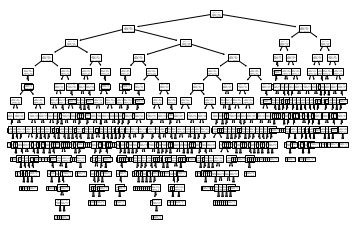

In [17]:
tree.plot_tree(clf1)

In [18]:
# get predictions and compare results
predictions1 = clf1.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions1})
results_df.sample(10)

Actual  Predicted
5713       1          1
8221       1          1
7332       1          1
3928       0          0
2399       0          0
1341       0          0
579        0          0
6655       1          1
4568       0          0
3172       0          0

In [19]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions1)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("before sampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

before sampling
Accuracy: 0.8414201183431953
Precision: 0.743006993006993
recall: 0.7783882783882784
f1_score: 0.7602862254025045


In [19]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded','translated_occupation_category_encoded']

dot_data = StringIO()
export_graphviz(clf1, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

<h3> Random Under Sampling<h3>

In [20]:
# random under sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

In [21]:
# initialise Decision Tree
clf2 = DecisionTreeClassifier(criterion='entropy',random_state=42) 

# train model
clf2.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.6202894251054852, 0.9705882352941176, 'X[0] <= 4.5\nentropy = 1.0\nsamples = 4582\nvalue = [2291, 2291]'),
 Text(0.35935522151898736, 0.9117647058823529, 'X[1] <= 0.5\nentropy = 0.982\nsamples = 3838\nvalue = [2220, 1618]'),
 Text(0.17695147679324894, 0.8529411764705882, 'X[2] <= 1.5\nentropy = 0.981\nsamples = 1631\nvalue = [682, 949]'),
 Text(0.10537974683544304, 0.7941176470588235, 'X[2] <= 0.5\nentropy = 0.884\nsamples = 1311\nvalue = [396, 915]'),
 Text(0.05147679324894515, 0.7352941176470589, 'X[3] <= 18.0\nentropy = 0.766\nsamples = 895\nvalue = [200, 695]'),
 Text(0.04810126582278481, 0.6764705882352942, 'X[3] <= 6.5\nentropy = 0.757\nsamples = 889\nvalue = [194, 695]'),
 Text(0.018565400843881856, 0.6176470588235294, 'X[0] <= 3.5\nentropy = 0.868\nsamples = 387\nvalue = [112, 275]'),
 Text(0.006751054852320675, 0.5588235294117647, 'X[0] <= 2.0\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.0033755274261603376, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'

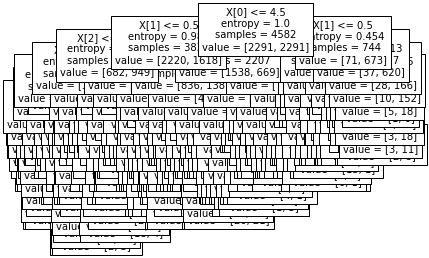

In [22]:
tree.plot_tree(clf2, fontsize=10)



(process:19756): GLib-GIO-WARNING **: 11:16:40.056: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



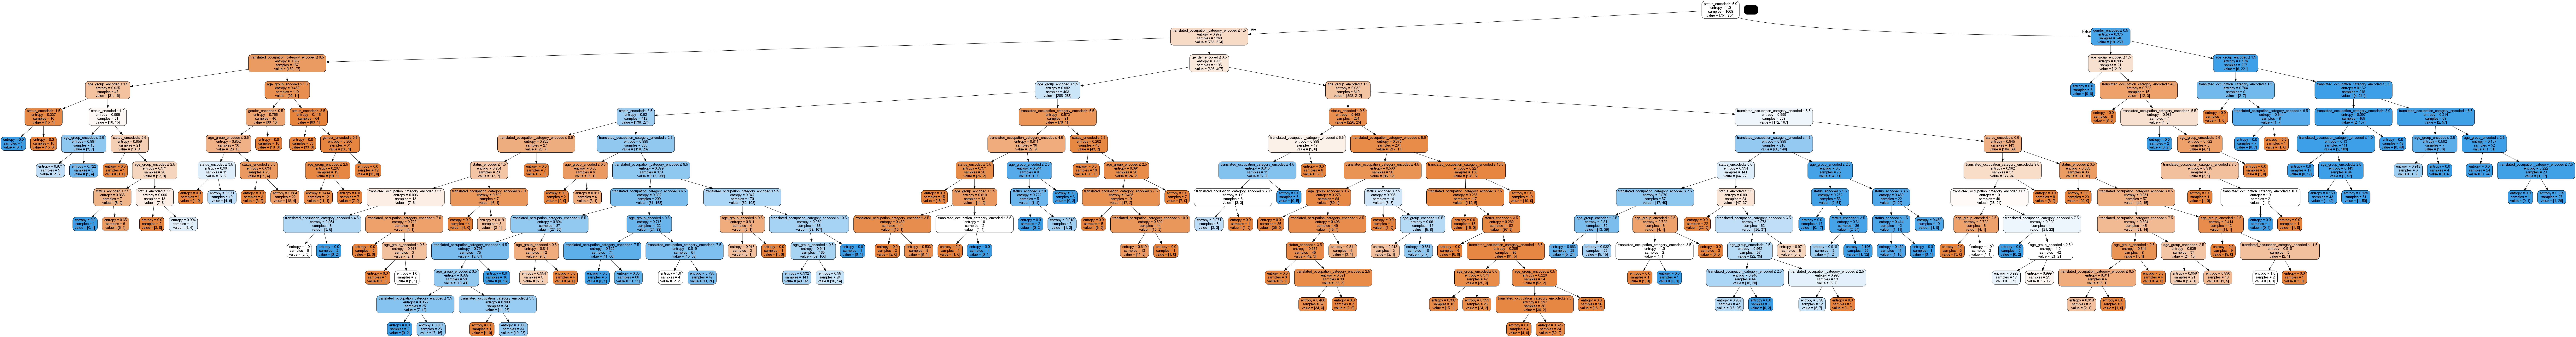

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded', 'translated_occupation_category_encoded']

dot_data = StringIO()
export_graphviz(clf2, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [23]:
# get predictions and compare results
predictions2 = clf2.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions2})
results_df.sample(10)

Actual  Predicted
2008       0          1
3301       0          0
8305       1          1
96         0          0
1131       0          0
4879       0          0
1126       0          0
972        0          0
886        0          0
7375       1          0

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions2)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("random undersampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

random undersampling
Accuracy: 0.8207100591715977
Precision: 0.6680497925311203
recall: 0.8846153846153846
f1_score: 0.7612293144208038


<h3> Random Over Sampling<h3>

In [25]:
# random over sampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

In [26]:
# initialise Decision Tree
clf3 = DecisionTreeClassifier(criterion='entropy',random_state=42) 

# train model
clf3.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.6310704826010887, 0.9666666666666667, 'X[0] <= 4.5\nentropy = 1.0\nsamples = 8934\nvalue = [4467, 4467]'),
 Text(0.36663163394245724, 0.9, 'X[1] <= 0.5\nentropy = 0.982\nsamples = 7471\nvalue = [4322, 3149]'),
 Text(0.187597200622084, 0.8333333333333334, 'X[2] <= 1.5\nentropy = 0.977\nsamples = 3222\nvalue = [1325, 1897]'),
 Text(0.11139191290824262, 0.7666666666666667, 'X[0] <= 3.5\nentropy = 0.871\nsamples = 2593\nvalue = [756, 1837]'),
 Text(0.06220839813374806, 0.7, 'X[0] <= 0.5\nentropy = 0.905\nsamples = 206\nvalue = [140, 66]'),
 Text(0.038880248833592534, 0.6333333333333333, 'X[3] <= 14.5\nentropy = 0.998\nsamples = 112\nvalue = [53, 59]'),
 Text(0.01866251944012442, 0.5666666666666667, 'X[3] <= 6.5\nentropy = 0.975\nsamples = 91\nvalue = [37, 54]'),
 Text(0.006220839813374806, 0.5, 'X[2] <= 0.5\nentropy = 0.852\nsamples = 18\nvalue = [13, 5]'),
 Text(0.003110419906687403, 0.43333333333333335, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.00933125972006221, 0.4

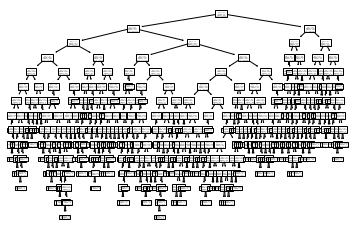

In [27]:
tree.plot_tree(clf3)

In [28]:
# get predictions and compare results
predictions3 = clf3.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions3})
results_df.sample(10)

Actual  Predicted
2819       0          0
7694       1          1
1429       0          1
4880       0          0
4425       0          0
6149       1          1
5737       1          0
1335       0          0
4233       0          1
5004       0          0

In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions3)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("random oversampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

random oversampling
Accuracy: 0.8159763313609467
Precision: 0.6572958500669344
recall: 0.8992673992673993
f1_score: 0.7594740912606341


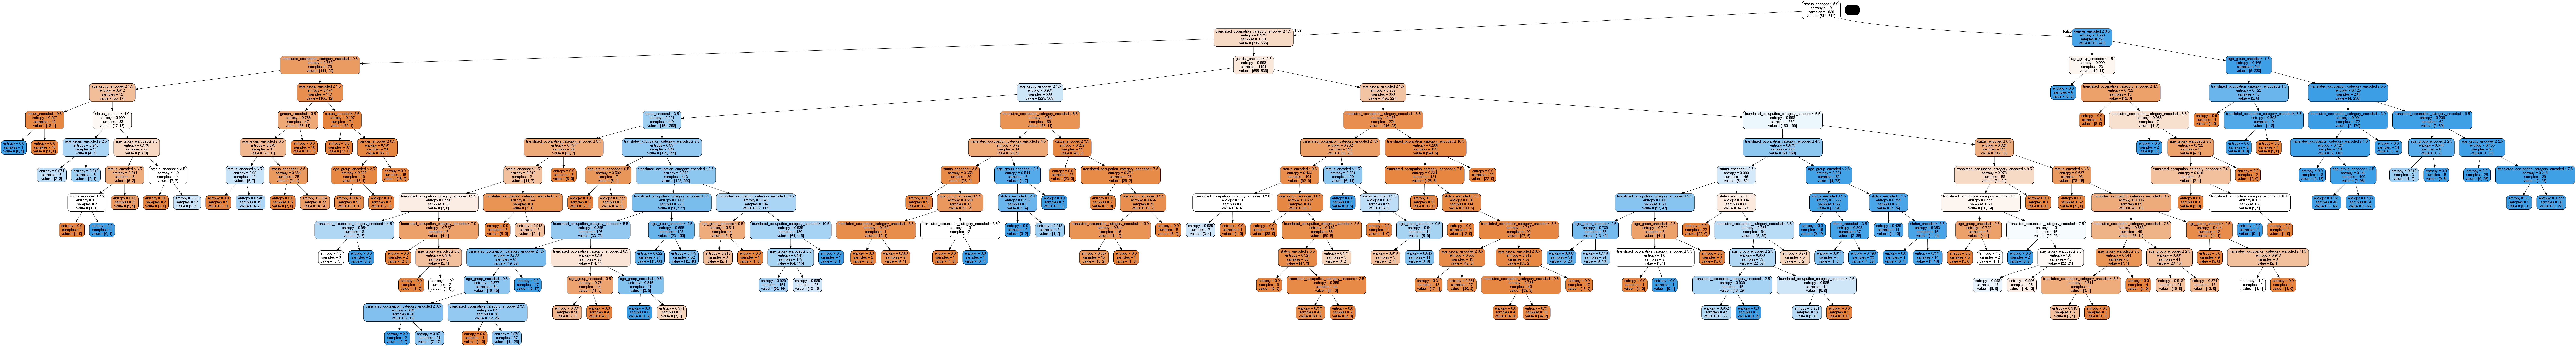

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded', 'translated_occupation_category_encoded']

dot_data = StringIO()
export_graphviz(clf3, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h3>Test on testing data<h3>

In [31]:
data = [[58,'married','male','engineer']]
testdf = pd.DataFrame(data, columns=['age', 'status','gender', 'translated_occupation_category'])
testdf['age_group_encoded'] = 3
testdf['status_encoded'] = 2
testdf['gender_encoded'] = 1
testdf['translated_occupation_category_encoded']=4
test = testdf[['status_encoded','gender_encoded','age_group_encoded','translated_occupation_category_encoded']]
pred = clf1.predict(test)
results = pd.DataFrame({'Pred': pred})
results

Pred
0     0